<a href="https://colab.research.google.com/github/eabemp1/silver-octo-train/blob/ml-learn/Introduction_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
%matplotlib inline

Data

In [ ]:
#Load the California housing dataset
housing_data = fetch_california_housing()
housing_data.keys()
housing_data['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
housing = pd.DataFrame(data=housing_data.data, columns=housing_data.feature_names)
housing['target'] = housing_data.target
housing.tail(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


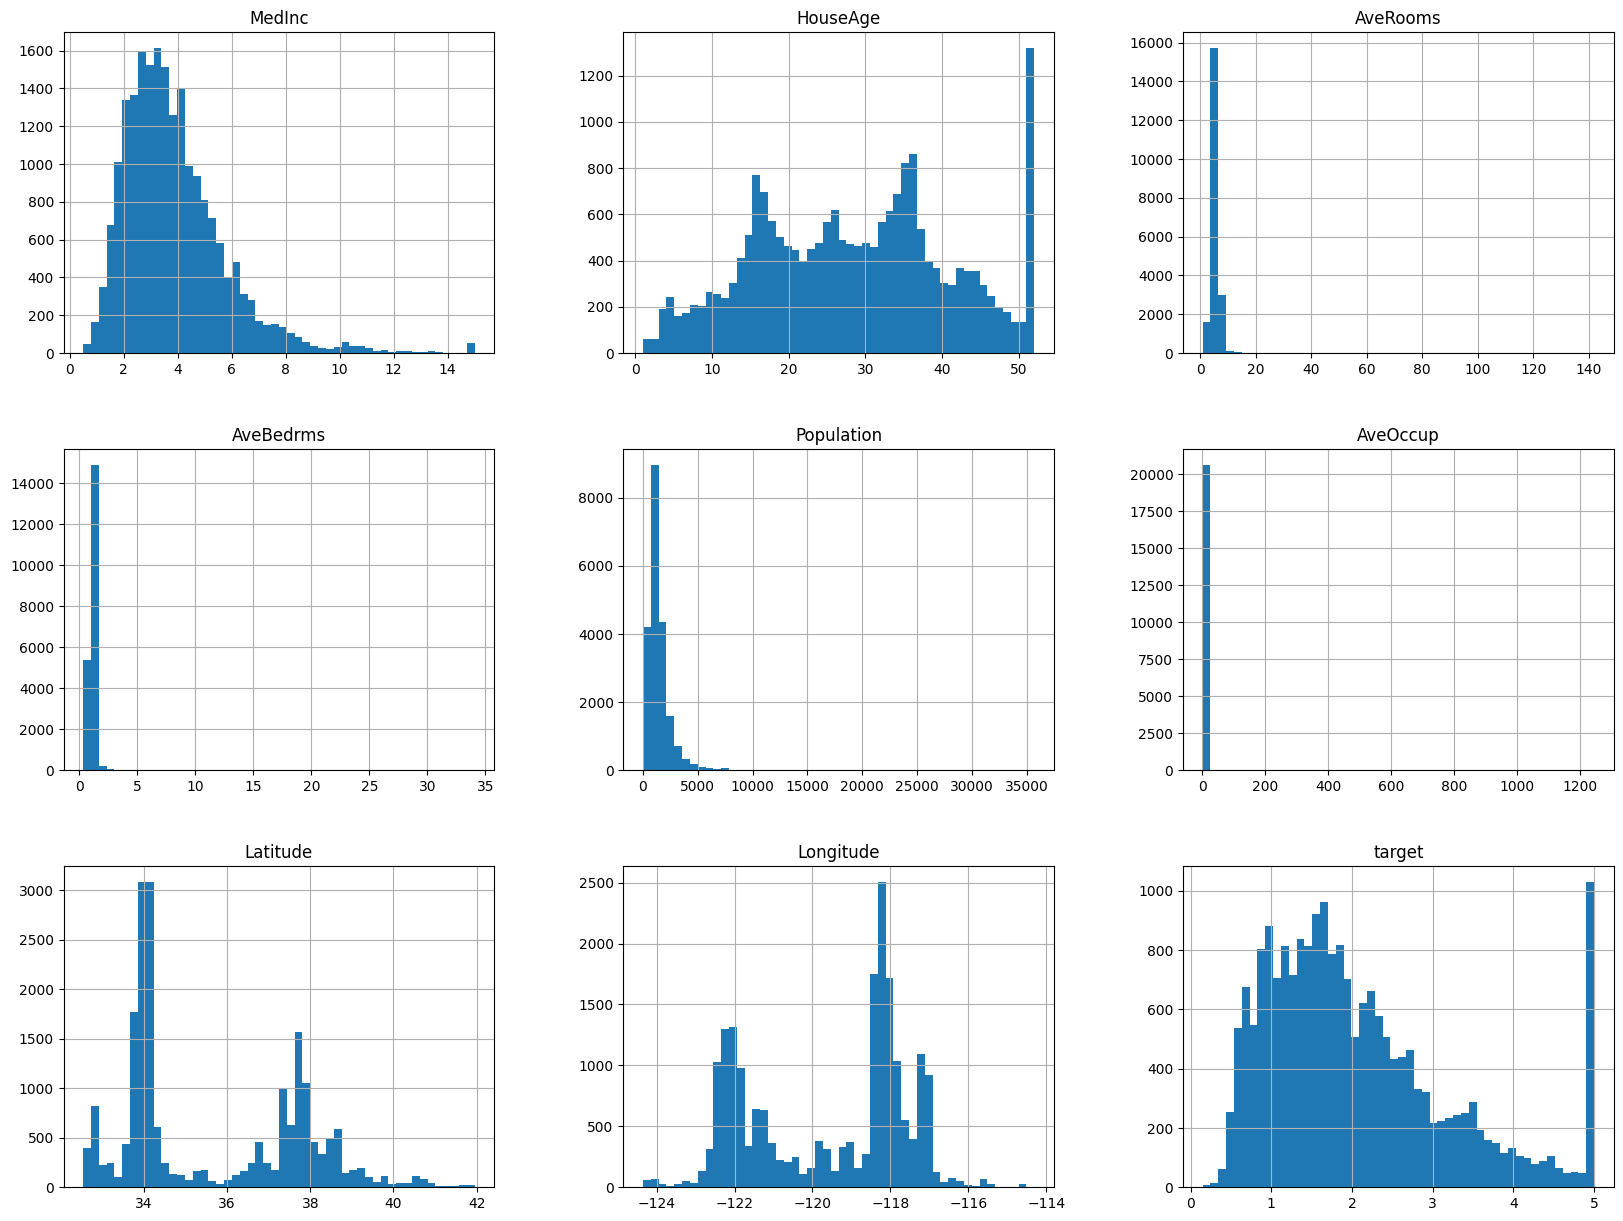

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='Longitude', ylabel='Latitude'>

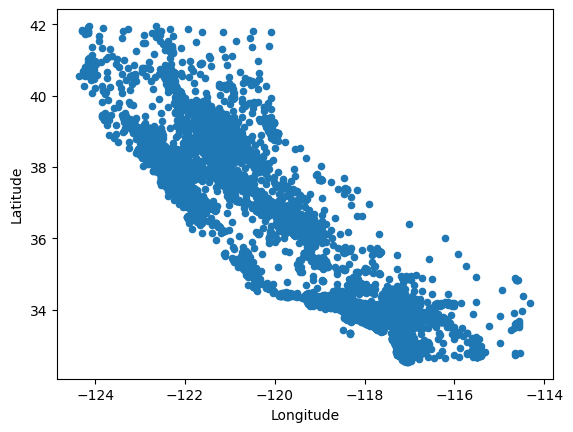

In [ ]:
housing.plot(kind="scatter", x="Longitude", y="Latitude")

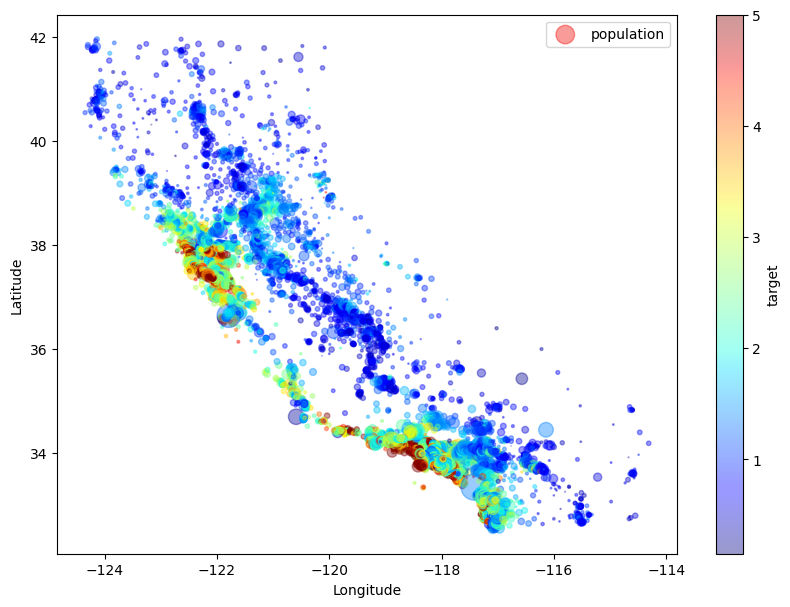

In [ ]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
             s=housing["Population"]/100, label="population", figsize=(10,7),
             c="target", cmap=plt.get_cmap("jet"), colorbar=True,
             )
plt.legend()

In [ ]:
corr_matrix = housing.corr()

corr_matrix["target"].sort_values(ascending=False)

,target
target,1.000000
MedInc,0.688075
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
Latitude,-0.144160


array([[<Axes: xlabel='target', ylabel='target'>,
        <Axes: xlabel='MedInc', ylabel='target'>,
        <Axes: xlabel='AveRooms', ylabel='target'>,
        <Axes: xlabel='HouseAge', ylabel='target'>],
       [<Axes: xlabel='target', ylabel='MedInc'>,
        <Axes: xlabel='MedInc', ylabel='MedInc'>,
        <Axes: xlabel='AveRooms', ylabel='MedInc'>,
        <Axes: xlabel='HouseAge', ylabel='MedInc'>],
       [<Axes: xlabel='target', ylabel='AveRooms'>,
        <Axes: xlabel='MedInc', ylabel='AveRooms'>,
        <Axes: xlabel='AveRooms', ylabel='AveRooms'>,
        <Axes: xlabel='HouseAge', ylabel='AveRooms'>],
       [<Axes: xlabel='target', ylabel='HouseAge'>,
        <Axes: xlabel='MedInc', ylabel='HouseAge'>,
        <Axes: xlabel='AveRooms', ylabel='HouseAge'>,
        <Axes: xlabel='HouseAge', ylabel='HouseAge'>]], dtype=object)

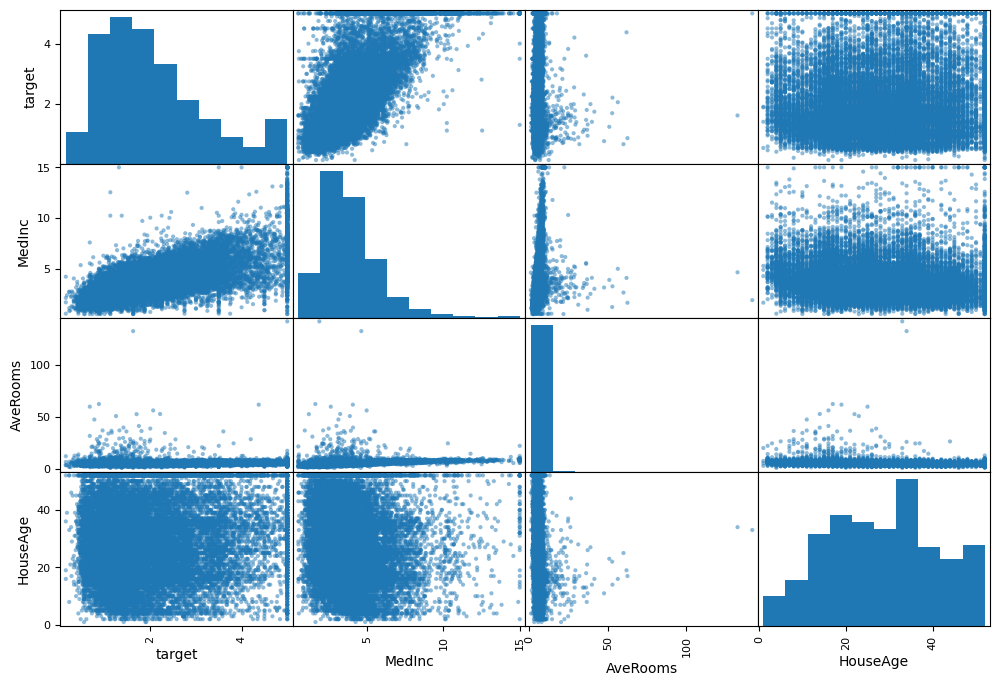

In [ ]:
attributes = ["target", "MedInc", "AveRooms",
              "HouseAge"]

scatter_matrix(housing[attributes], figsize=(12,8))

**Feature Engineering**

In [ ]:
housing["rooms_per_household"] = housing["AveRooms"]/housing["AveOccup"]
housing["bedrooms_per_room"] = housing["AveBedrms"]/housing["AveRooms"]
housing["population_per_household"]=housing["Population"]/housing["AveOccup"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["target"].sort_values(ascending=False)

,target
target,1.000000
MedInc,0.688075
rooms_per_household,0.209482
AveRooms,0.151948
HouseAge,0.105623
population_per_household,0.065843
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701
